In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv("haberman.data", low_memory=False, names=["Age", "Operation_Year", "Pos_Aux_Nodes", "Survival_Status"])

In [64]:
df.head()

,Age,Operation_Year,Pos_Aux_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [65]:
df["Survival_Status"].value_counts()

1    225
2     81
Name: Survival_Status, dtype: int64

<AxesSubplot:xlabel='Survival_Status', ylabel='count'>

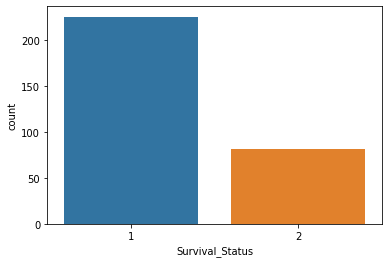

In [66]:
sns.countplot(data=df, x="Survival_Status")

<AxesSubplot:xlabel='Age', ylabel='Pos_Aux_Nodes'>

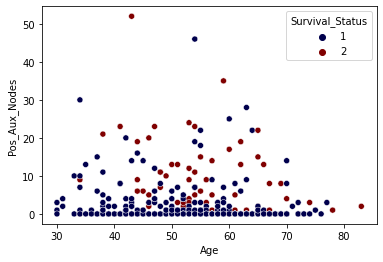

In [67]:
sns.scatterplot(x="Age", y="Pos_Aux_Nodes", hue="Survival_Status", data=df, palette="seismic")

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [69]:
X = df.drop("Survival_Status", axis=1)
y = df["Survival_Status"]

X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.2, random_state=1)
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=1)

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_eval = scaler.transform(X_eval)
scaled_X_test = scaler.transform(X_test)

In [70]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [71]:
svm = SVC()
param_grid = {"C": [0.5, 1, 1.1], "kernel" : ["linear", "rbf", "sigmoid"], "gamma": ["scale", "auto", 0.1, 0.2], "class_weight": ["balanced"], "probability" : [True]}
grid = GridSearchCV(svm,param_grid)
grid.fit(scaled_X_train, y_train)
grid.best_params_

{'C': 0.5,
 'class_weight': 'balanced',
 'gamma': 'scale',
 'kernel': 'linear',
 'probability': True}

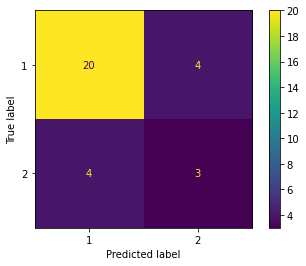

In [72]:
y_pred = grid.predict(scaled_X_eval)
plot_confusion_matrix(grid, scaled_X_eval, y_eval)

In [73]:
print(precision_score(y_eval, y_pred))
print(recall_score(y_eval, y_pred))
print(f1_score(y_eval, y_pred))

0.8333333333333334
0.8333333333333334
0.8333333333333334


In [74]:
roc_auc_score(y_eval, y_pred)

0.6309523809523809

#### Final Predictions

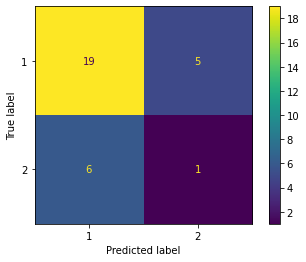

In [62]:
final_pred = grid.predict(scaled_X_test)
plot_confusion_matrix(grid, scaled_X_test, y_test)

In [48]:
print(precision_score(y_test, final_pred))
print(recall_score(y_test, final_pred))
print(f1_score(y_test, final_pred))

0.76
0.7916666666666666
0.7755102040816326


In [76]:
roc_auc_score(y_test, final_pred)

0.4672619047619047